In [1]:
from fastai.vision import *

In [28]:
PATH = Path("/home/turgutluk/data/breast_path/")

In [29]:
PATH.ls()[:3]

[PosixPath('/home/turgutluk/data/breast_path/labels'),
 PosixPath('/home/turgutluk/data/breast_path/Images'),
 PosixPath('/home/turgutluk/data/breast_path/images')]

In [31]:
files = get_files(PATH/"Images", recurse=True)

In [32]:
o = files[0]

In [33]:
images = [o for o in files if "Seg" not in o.name]
labels = [o for o in files if "Seg" in o.name]

In [34]:
images[:3], labels[:3]

([PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020282_2.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020177_2.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020392_2.tif')],
 [PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020095_2_FinalSeg.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020383_2_FinalSeg.tif'),
  PosixPath('/home/turgutluk/data/breast_path/Images/DCIS_020490_2_FinalSeg.tif')])

In [35]:
len(images), len(labels)

(30, 30)

### images

In [36]:
image_id2fn = defaultdict(list)
for o in images:
    image_id = o.stem.split("_")[1] 
    image_id2fn[image_id].append(o)

In [37]:
# ! version of image per patch ?
assert len(image_id2fn) == len(images)

In [38]:
for k, v in image_id2fn.items(): pass

image id: 020098


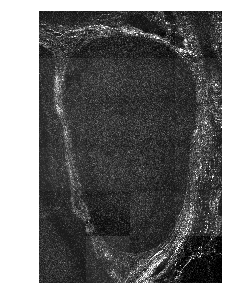

In [39]:
print(f"image id: {k}"); img = open_image(v[0]); img.show(figsize=(5,5))

In [40]:
# this is actually a single channel image!
img.data

tensor([[[0.0706, 0.0706, 0.0706,  ..., 0.1255, 0.1608, 0.0902],
         [0.1608, 0.0902, 0.0902,  ..., 0.1059, 0.2157, 0.1059],
         [0.2549, 0.0902, 0.1059,  ..., 0.1451, 0.1255, 0.1608],
         ...,
         [0.1255, 0.1451, 0.1059,  ..., 0.0000, 0.0000, 0.0000],
         [0.1059, 0.2000, 0.2353,  ..., 0.1255, 0.0000, 0.0000],
         [0.1059, 0.1804, 0.1059,  ..., 0.0000, 0.0706, 0.0706]],

        [[0.0706, 0.0706, 0.0706,  ..., 0.1255, 0.1608, 0.0902],
         [0.1608, 0.0902, 0.0902,  ..., 0.1059, 0.2157, 0.1059],
         [0.2549, 0.0902, 0.1059,  ..., 0.1451, 0.1255, 0.1608],
         ...,
         [0.1255, 0.1451, 0.1059,  ..., 0.0000, 0.0000, 0.0000],
         [0.1059, 0.2000, 0.2353,  ..., 0.1255, 0.0000, 0.0000],
         [0.1059, 0.1804, 0.1059,  ..., 0.0000, 0.0706, 0.0706]],

        [[0.0706, 0.0706, 0.0706,  ..., 0.1255, 0.1608, 0.0902],
         [0.1608, 0.0902, 0.0902,  ..., 0.1059, 0.2157, 0.1059],
         [0.2549, 0.0902, 0.1059,  ..., 0.1451, 0.1255, 0.

In [41]:
# check if data is duplicate over 3 channels
assert torch.equal(img.data[0], img.data[1]) == torch.equal(img.data[0], img.data[2])

### labels

In [42]:
label_id2fn = defaultdict(list)
for o in labels:
    label_id = o.stem.split("_")[1] 
    label_id2fn[label_id].append(o)

In [43]:
assert len(label_id2fn) == len(labels)

mask id: 020098


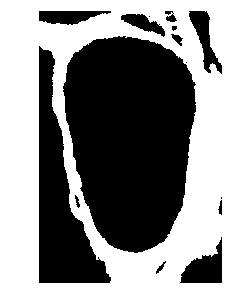

In [44]:
# masks are 0-255
print(f"mask id: {k}"); mask = open_mask(label_id2fn[k][0], div=True);
mask.show(figsize=(5,5), alpha=1., cmap='gray')

In [45]:
assert torch.equal(mask.data.unique(), tensor([0,1]))

### save images and labels

In [48]:
os.makedirs(PATH/'images', exist_ok=True)
os.makedirs(PATH/'labels', exist_ok=True)

In [49]:
# save images
for k,l in image_id2fn.items():
    save_fn = PATH/'images'/f'{k}.tif'
    img = open_image(l[0])
    img.save(save_fn)

In [50]:
# save labels
for k,l in label_id2fn.items():
    mask = open_mask(l[0], div=True)
    assert torch.equal(mask.data.unique(), tensor([0,1]))
    savefn = PATH/'labels'/f'{k}.tif'
    mask.save(savefn)
    mask = open_mask(savefn, div=False)
    assert torch.equal(mask.data.unique(), tensor([0,1]))

### show

In [51]:
imagefiles = get_files(PATH/'images')
maskfiles = get_files(PATH/'labels')

In [53]:
imagefiles[0], maskfiles[0]

(PosixPath('/home/turgutluk/data/breast_path/images/020227.tif'),
 PosixPath('/home/turgutluk/data/breast_path/labels/020227.tif'))

In [56]:
img = open_image(imagefiles[0])
mask = open_mask(maskfiles[0])

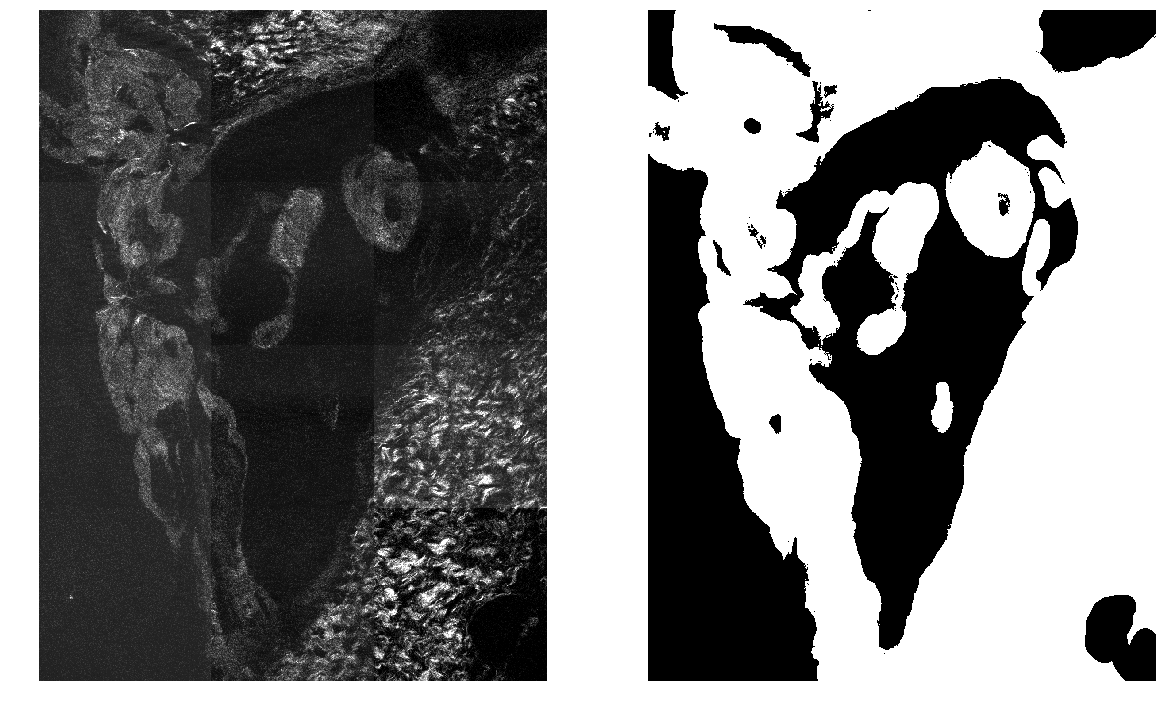

In [61]:
fig, axes = plt.subplots(1,2, figsize=(20,20))
img.show(ax=axes[0])
mask.show(ax=axes[1], cmap='gray', alpha=1.0)

### statistics

In [63]:
il = ImageList.from_folder(PATH/'images')
ll = SegmentationLabelList.from_folder(PATH/'labels')

In [65]:
il

ImageList (30 items)
Image (3, 1517, 1148),Image (3, 1148, 1148),Image (3, 1148, 1148),Image (3, 1517, 1517),Image (3, 1148, 1148)
Path: /home/turgutluk/data/breast_path/images

In [64]:
ll

SegmentationLabelList (30 items)
ImageSegment (1, 1517, 1148),ImageSegment (1, 1148, 1148),ImageSegment (1, 1148, 1148),ImageSegment (1, 1517, 1517),ImageSegment (1, 1148, 1148)
Path: /home/turgutluk/data/breast_path/labels

In [69]:
image_sizes = [o.size for o in il]
label_sizes = [o.size for o in ll]

In [72]:
assert image_sizes == label_sizes

In [77]:
h,w = list(zip(*image_sizes))

In [100]:
counts = defaultdict(int)
for hi, wi in zip(h,w):
    counts[(hi, wi)] += 1

In [101]:
counts

defaultdict(int,
            {(1517, 1148): 5,
             (1148, 1148): 10,
             (1517, 1517): 3,
             (1148, 779): 2,
             (1148, 1886): 2,
             (1517, 1886): 3,
             (779, 1148): 2,
             (1517, 2255): 1,
             (2255, 2255): 1,
             (2255, 1517): 1})

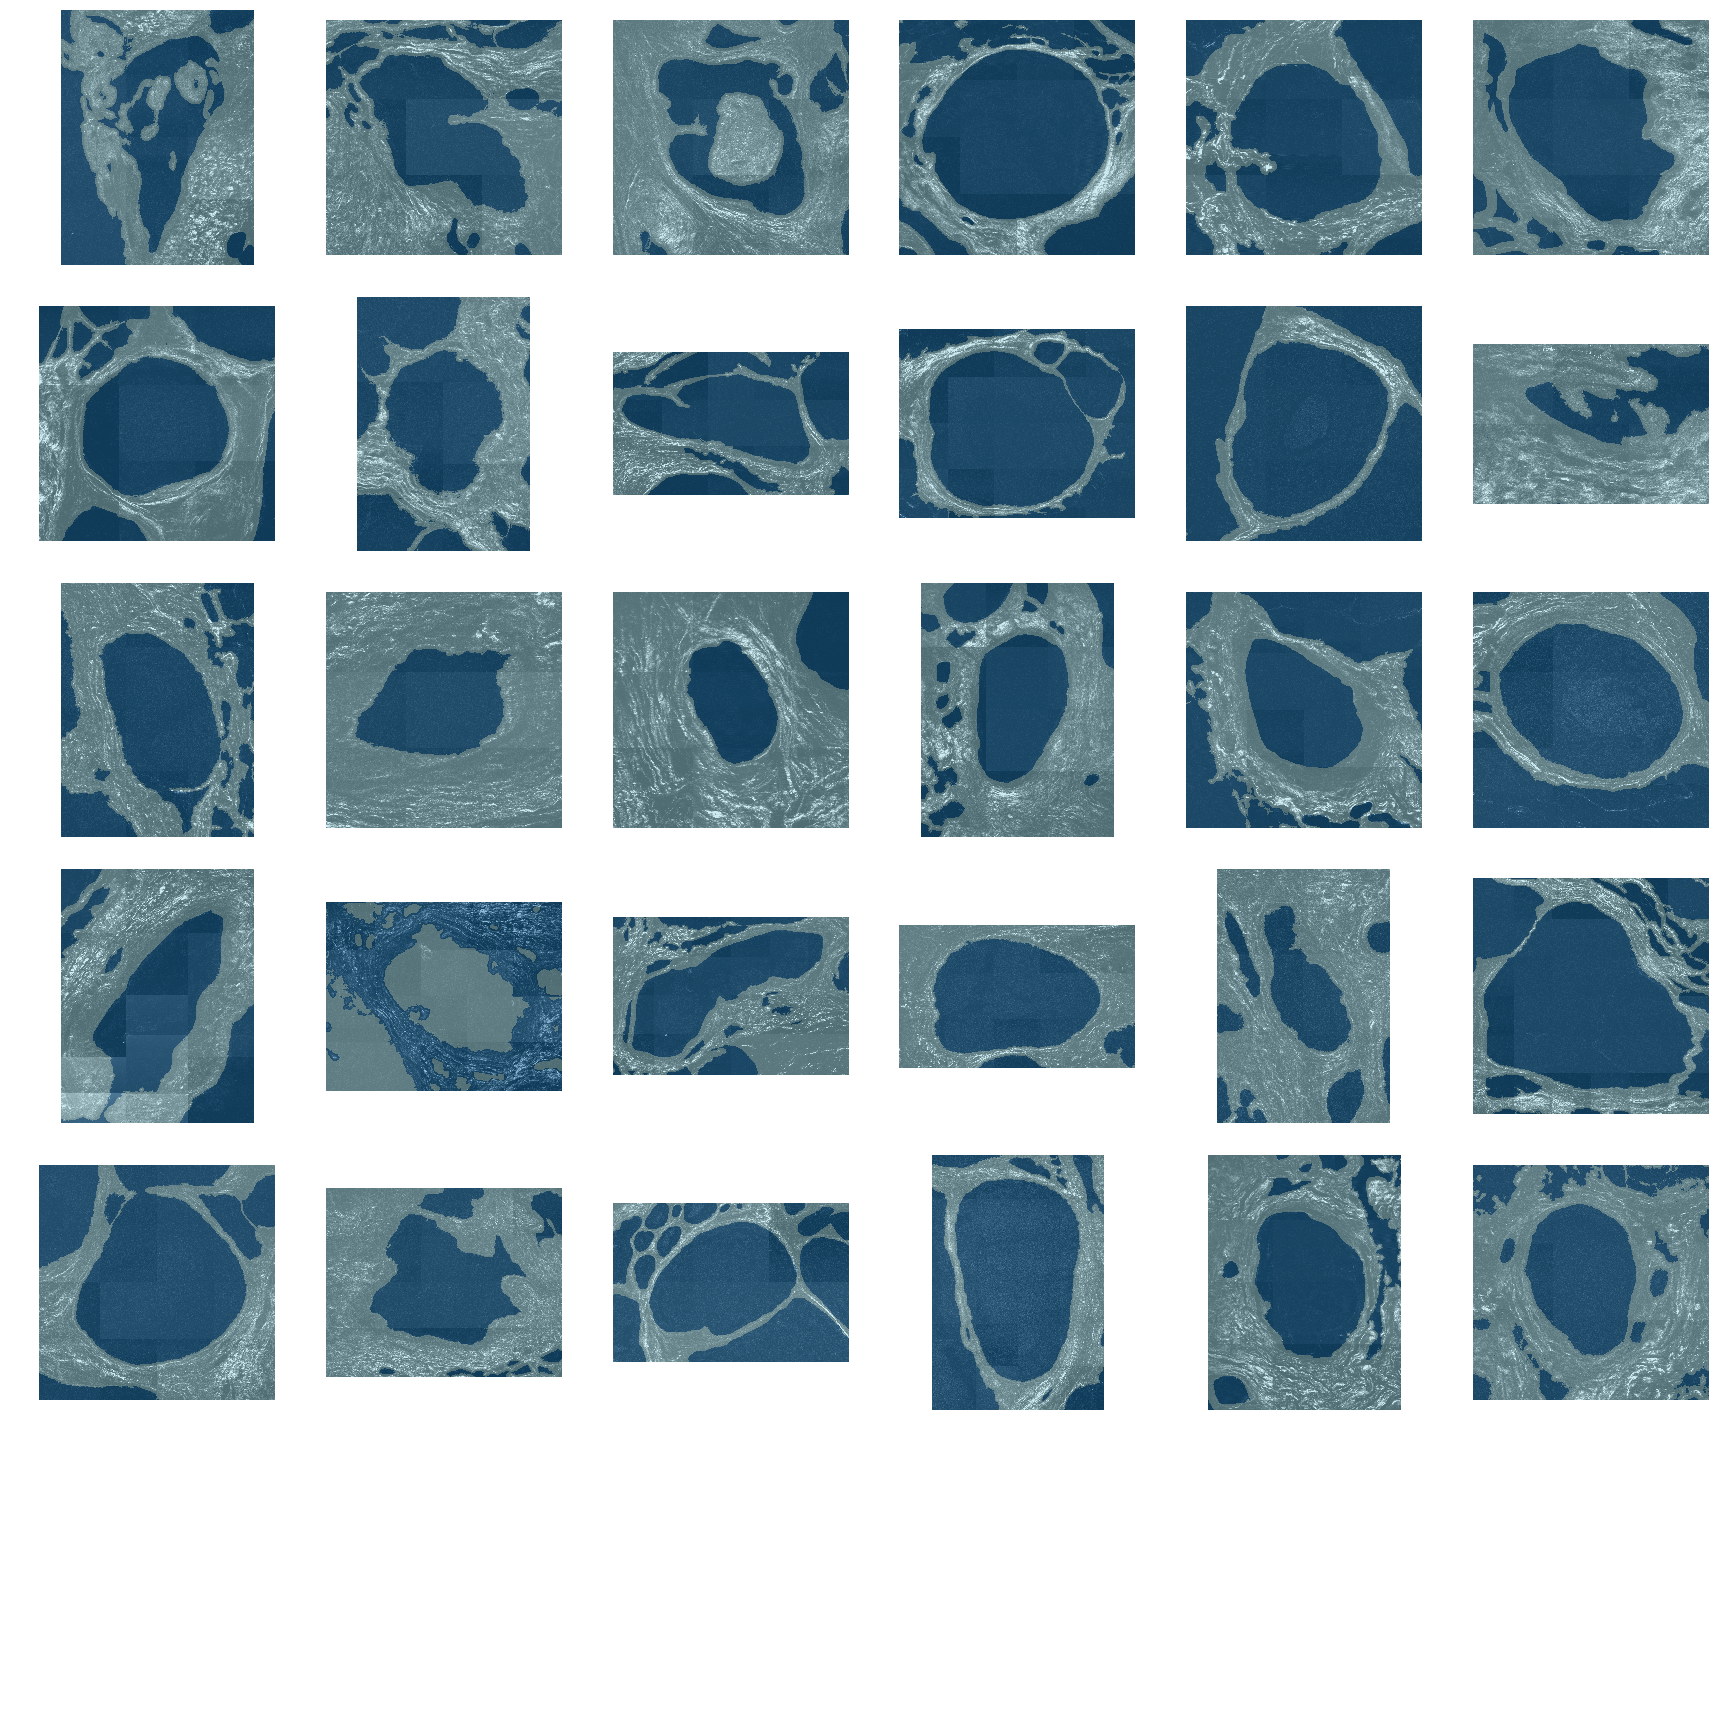

In [102]:
il.show_xys(il, ll)

### add codes and test

In [104]:
images = (PATH/'images').ls()

In [108]:
test_images = np.random.choice(images,5)

In [109]:
train_images = [o for o in images if o not in test_images]

In [110]:
len(test_images),len(train_images)

(5, 25)

In [120]:
with open(PATH/'codes.txt', 'w') as f: f.write("Background\nWall")

In [124]:
with open(PATH/'train.txt', 'w') as f: f.write("\n".join([o.name for o in train_images]))

In [125]:
with open(PATH/'test.txt', 'w') as f: f.write("\n".join([o.name for o in test_images]))

In [126]:
PATH.ls()

[PosixPath('/home/turgutluk/data/breast_path/labels'),
 PosixPath('/home/turgutluk/data/breast_path/Images'),
 PosixPath('/home/turgutluk/data/breast_path/test.txt'),
 PosixPath('/home/turgutluk/data/breast_path/images'),
 PosixPath('/home/turgutluk/data/breast_path/train.txt'),
 PosixPath('/home/turgutluk/data/breast_path/codes.txt')]